In [1]:
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import zipfile
%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2017


# IDEA:
## Women are less likely than men to choose biking during the night (9:00pm - 6:00am).

# NULL HYPOTHESIS:
## The ratio of man biking at night over man biking during the day is _the same_ or _less_  than the ratio of woman biking at night to woman biking during the day.

# _$H_0$_ : $\frac{W_{\mathrm{night}}}{W_{\mathrm{day}}} >= \frac{M_{\mathrm{night}}}{M_{\mathrm{day}}}$
# _$H_1$_ : $\frac{W_{\mathrm{night}}}{W_{\mathrm{day}}} < \frac{M_{\mathrm{night}}}{M_{\mathrm{day}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from MAR 2017

In [2]:
!ls /gws/open/Student/citibike/

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [3]:
Zip = zipfile.ZipFile("/gws/open/Student/citibike/201703-citibike-tripdata.csv.zip")
Zip.extractall(path=(os.getenv('PUIDATA')+'/citibike'))

In [40]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + "citibike" + "/"+ '201703-citibike-tripdata.csv')

df['time'] = pd.to_datetime(df['Start Time'])

df.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,time
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2,2017-03-01 00:00:32
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2,2017-03-01 00:01:09
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1,2017-03-01 00:01:27


In [41]:
df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender', u'time'],
      dtype='object')

In [42]:
df.drop(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 
         'Bike ID', 'User Type', 'Birth Year'], axis=1, inplace=True)
df.head()

,Gender,time
0,2,2017-03-01 00:00:32
1,2,2017-03-01 00:01:09
2,1,2017-03-01 00:01:27
3,1,2017-03-01 00:01:29
4,1,2017-03-01 00:01:33


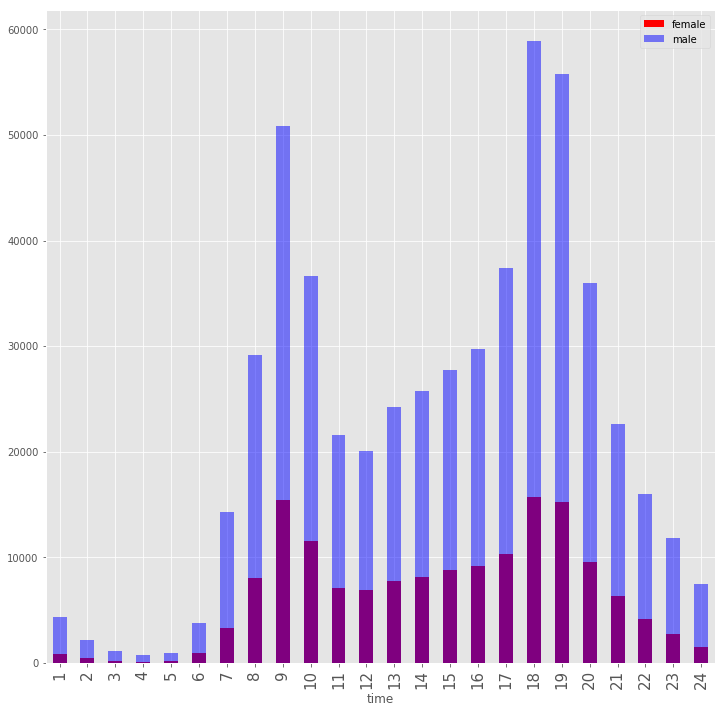

In [8]:
fig = pl.figure(figsize(12, 12))


norm_w = 1
((df['time'][df['Gender'] == 2].groupby([df['time'].dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='r', 
                                                                                         label='female')

norm_m = 1
ax = ((df['time'][df['Gender'] == 1].groupby([df['time'].dt.hour]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='b', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                               '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
pl.legend()

## Figure 1a: Hourly Distribution of Citibike bikers by gender in March 2017, absolute counts

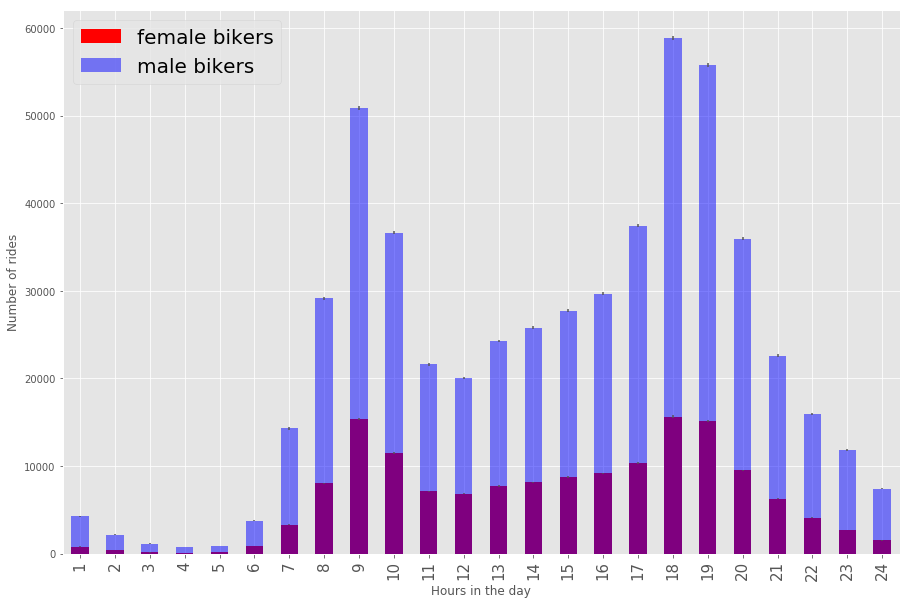

In [9]:
fig=pl.figure(figsize(15,10))

counts_w = df.time[df.Gender == 2].groupby([df.time.dt.hour]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='r',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='female bikers')


counts_m = df.time[df.Gender==1].groupby([df.time.dt.hour]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='b', label='male bikers')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Hours in the day")
pl.legend(['female bikers','male bikers'],fontsize=20)


## Figure 1b: Hourly Distribution of Citibike bikers by gender in March 2017, absolute counts, with statistical errors

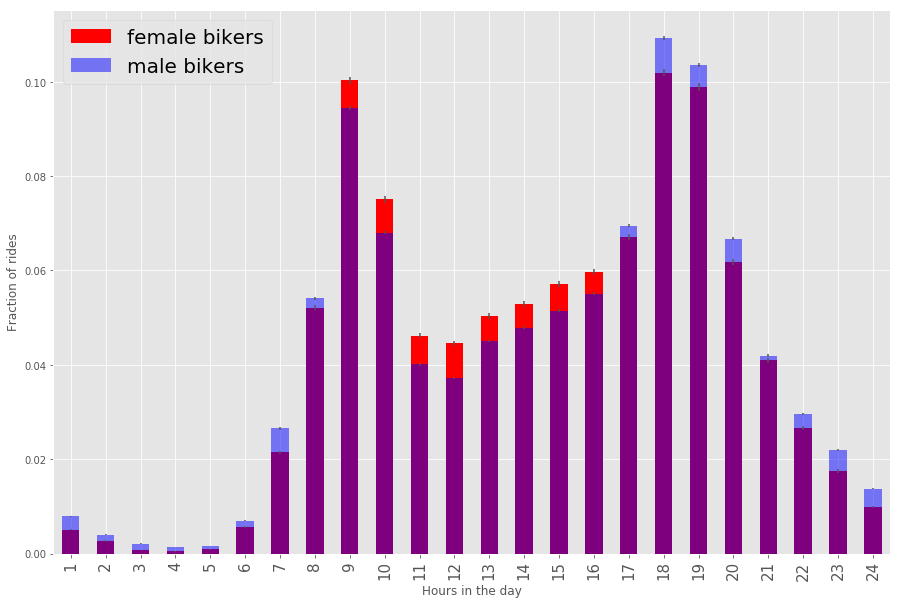

In [10]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='r',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='female bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='b', label='male bikers')

ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Hours in the day")

pl.legend(['female bikers','male bikers'],fontsize=20)


## Figure 2: Hourly Distribution of Citibike bikers by gender in March 2017, normalized

## Set up the test of proportions
### The fraction of women that bikes during the nights and the fraction that bikes during days, and the same for men

Men: day:0.868809524251, night:0.0375795126134, day error:0.00126989625359, night error:time
0     0.000052
1     0.000038
2     0.000020
3     0.000016
4     0.000021
5     0.000054
6     0.000106
20    0.000147
21    0.000119
22    0.000096
23    0.000072
Name: time, dtype: float64
Women: day:0.88953321692, night:0.131916390836, day error:0.00240746980698, night error:0.052812161586


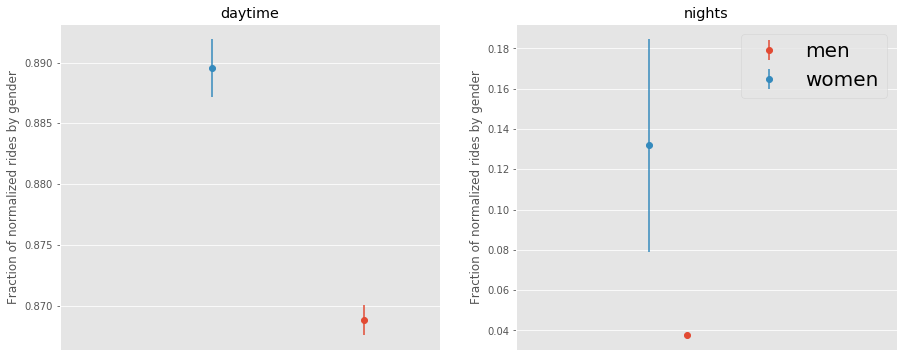

In [12]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

day_w = sum(counts_w[6:20]) * 1.0 / norm_w  #fraction of women riding on daytime
night_w = sum(counts_w[0:7].append(counts_w[-4:])) * 1.0 / norm_w  #fraction of women riding at nights
eday_w = np.sqrt(sum(error_w[6:20]**2)) / norm_w  #error on fraction number of women riding on daytime
enight_w = np.sqrt(sum(counts_w[0:7].append(counts_w[-4:]**2))) / norm_w #error on fraction number of women riding at nights


day_m = sum(counts_m[6:20]) * 1.0 / norm_m
night_m = sum(counts_w[0:7].append(counts_w[-4:])) * 1.0 / norm_m
eday_m = np.sqrt(sum(error_m[6:20]**2)) / norm_m
enight_m = np.sqrt(counts_w[0:7].append(counts_w[-4:])) / norm_m

print("Men: day:{}, night:{}, day error:{}, night error:{}"\
      .format(day_m, night_m, eday_m, enight_m))
print("Women: day:{}, night:{}, day error:{}, night error:{}"\
      .format(day_w, night_w, eday_w, enight_w))

ax1.errorbar([0.4], [day_m], yerr=[eday_m], fmt='o', label='men')
ax1.errorbar([0.2], [day_w], yerr=[eday_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_m], yerr=[enight_m], fmt='o', label='men')
ax2.errorbar([0.2], [night_w], yerr=[enight_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("daytime")
ax2.set_title("nights")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

### Is the percentage of women that ride at nights lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{Night}}}{W_{\mathrm{day}}}$
### and 
# $p_1 = \frac{M_{\mathrm{Night}}}{M_{\mathrm{day}}}$


In [13]:
P0mP1 = night_w - night_m
print ("difference between man and women at nights: ", P0mP1)
if P0mP1 <= 0:
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

('difference between man and women at nights: ', 0.094336878222918585)
We must check the significance before we reject the Null Hypothesis


In [14]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(night_w, night_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(night_w, night_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 138.93


## The largest number reported in  z stats tables is 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant.

# We reject the null hypothesis that The ratio of man biking at night over man biking during the whole day is _the same_ or _less_  than the ratio of woman biking at night to woman biking during the day. We can conclude that women are less likely than men to choose biking during the night (9:00pm - 6:00am).